In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

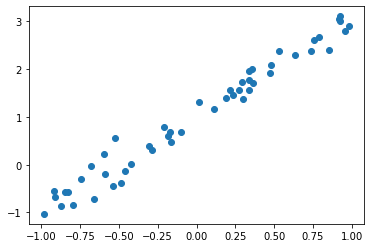

In [2]:
# generate a linear-looking dataset
m = 50 # number of points
x = -1 + 2*np.random.rand(m,1) # m random points between -1 and 1
y = 2*x + 1 + 0.25*np.random.randn(m,1)
plt.scatter(x,y)

In [3]:
# linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

In [4]:
# coefficients
lin_reg.intercept_

array([1.03187486])

In [5]:
# predictions
x_new = [[-0.5],[0.25],[1.5]]
lin_reg.predict(x_new)

array([[0.02064788],
       [1.53748836],
       [4.06555583]])

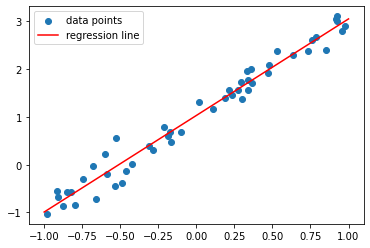

In [6]:
# plot regression line
m_plot = 100
x_plot = np.linspace(-1,1,m_plot).reshape(m_plot,1) # m_plot points evenly spaced
y_plot = lin_reg.predict(x_plot)

plt.scatter(x,y,label='data points')
plt.plot(x_plot,y_plot,label='regression line',color='red')
plt.legend()

## Forecasting weekly COVID deaths 6 weeks into the future

In [7]:
path = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv'
covid = pd.read_csv(path,index_col='date',parse_dates=True)
covid

,cases,deaths
date,,
2020-01-21,1,0
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,3,0
...,...,...
2022-10-14,96701589,1060816
2022-10-15,96704365,1060834
2022-10-16,96711411,1060846


<AxesSubplot:xlabel='date'>

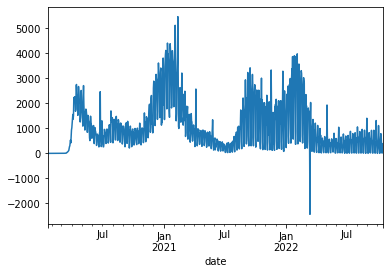

In [8]:
covid.deaths.diff().plot() # daily deaths

In [9]:
covid = covid.diff()['10-01-2020':].resample('w').sum() # weekly number of cases/deaths

<AxesSubplot:xlabel='date'>

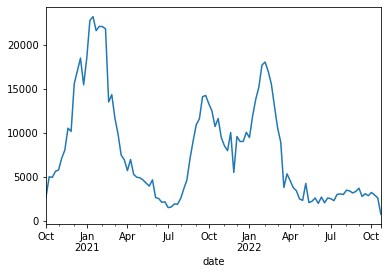

In [10]:
covid.deaths.plot()

In [11]:
# google trends data
trends = pd.read_csv('trends.csv',parse_dates=True,skiprows=2,index_col='Week')
trends

,covid symptoms: (United States)
Week,
2020-10-04,44
2020-10-11,37
2020-10-18,39
2020-10-25,42
2020-11-01,40
...,...
2022-09-11,13
2022-09-18,12
2022-09-25,10


In [12]:
covid['google_searches'] = trends['covid symptoms: (United States)']

In [13]:
covid

,cases,deaths,google_searches
date,,,
2020-10-04,182840.0,2754.0,44.0
2020-10-11,370067.0,5000.0,37.0
2020-10-18,398722.0,4935.0,39.0
2020-10-25,488992.0,5623.0,42.0
2020-11-01,579846.0,5776.0,40.0
...,...,...,...
2022-09-25,379251.0,2856.0,10.0
2022-10-02,337651.0,3217.0,10.0
2022-10-09,283167.0,2929.0,10.0


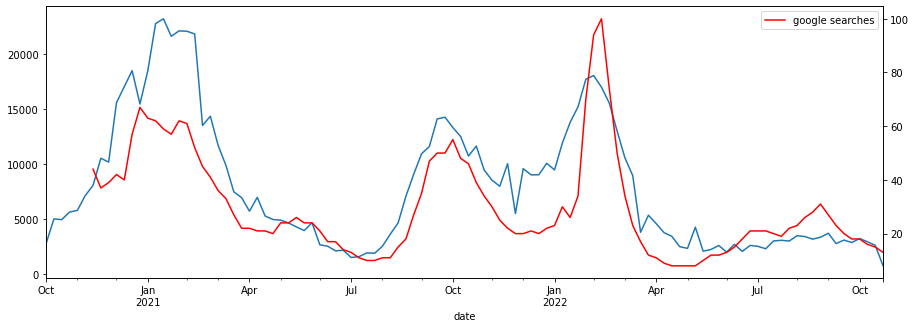

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
covid.deaths.plot(ax=ax,label='covid deaths')
covid.google_searches.shift(6).plot(ax=ax.twinx(),label='google searches',color='red')
plt.legend()

In [16]:
covid['google_searches_6weeks_shift']=covid.google_searches.shift(6)
covid.tail(15)

,cases,deaths,google_searches,google_searches_6weeks_shift
date,,,,
2022-07-17,908293.0,2997.0,31.0,20.0
2022-07-24,901893.0,3060.0,27.0,19.0
2022-07-31,870186.0,2988.0,23.0,22.0
2022-08-07,820292.0,3477.0,20.0,23.0
2022-08-14,725597.0,3399.0,18.0,26.0
2022-08-21,661388.0,3161.0,18.0,28.0
2022-08-28,631178.0,3338.0,16.0,31.0
2022-09-04,594204.0,3696.0,15.0,27.0
2022-09-11,465510.0,2762.0,13.0,23.0


In [17]:
# drop rows with nans
covid.dropna(axis=0,inplace=True)

In [19]:
#linear regression
y = covid.deaths
X = covid[['google_searches_6weeks_shift']]
linreg = LinearRegression()
linreg.fit(X,y)
covid['prediction'] = linreg.predict(X)

<AxesSubplot:xlabel='date'>

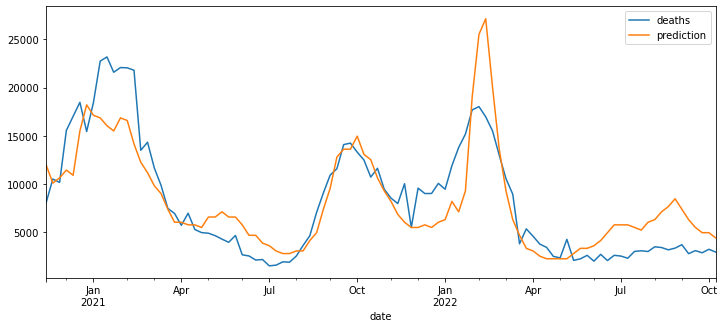

In [20]:
covid[['deaths','prediction']].plot(figsize=(12,5))

In [34]:
covid.tail(15)

,cases,deaths,google_searches,google_searches_6weeks_shift,prediction
date,,,,,
2022-07-03,746050.0,2512.0,26.0,21.0,5753.890915
2022-07-10,796079.0,2288.0,28.0,21.0,5753.890915
2022-07-17,908293.0,2997.0,31.0,20.0,5483.091238
2022-07-24,901893.0,3060.0,27.0,19.0,5212.291560
2022-07-31,870186.0,2988.0,23.0,22.0,6024.690593
2022-08-07,820292.0,3477.0,20.0,23.0,6295.490270
2022-08-14,725597.0,3399.0,18.0,26.0,7107.889303
2022-08-21,661388.0,3161.0,18.0,28.0,7649.488658
2022-08-28,631178.0,3338.0,16.0,31.0,8461.887690


In [23]:
# last date 
last_date = covid.index[-1]
last_date

Timestamp('2022-10-09 00:00:00', freq='W-SUN')

In [24]:
# next 6 dates 
new_dates = [last_date + i*pd.Timedelta(7,'days') for i in range(7)]
new_dates

[Timestamp('2022-10-09 00:00:00', freq='W-SUN'),
 Timestamp('2022-10-16 00:00:00', freq='W-SUN'),
 Timestamp('2022-10-23 00:00:00', freq='W-SUN'),
 Timestamp('2022-10-30 00:00:00', freq='W-SUN'),
 Timestamp('2022-11-06 00:00:00', freq='W-SUN'),
 Timestamp('2022-11-13 00:00:00', freq='W-SUN'),
 Timestamp('2022-11-20 00:00:00', freq='W-SUN')]

In [32]:
last_7weeks = covid[['google_searches']].iloc[-7:]
last_7weeks.index = new_dates
last_7weeks

,google_searches
2022-10-09,16.0
2022-10-16,15.0
2022-10-23,13.0
2022-10-30,12.0
2022-11-06,10.0
2022-11-13,10.0
2022-11-20,10.0


In [33]:
last_7weeks['forecast'] = linreg.predict(last_7weeks)
last_7weeks

C:\Users\rebec\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- google_searches
Feature names seen at fit time, yet now missing:
- google_searches_6weeks_shift

  warnings.warn(message, FutureWarning)


,google_searches,forecast
2022-10-09,16.0,4399.892528
2022-10-16,15.0,4129.092850
2022-10-23,13.0,3587.493495
2022-10-30,12.0,3316.693818
2022-11-06,10.0,2775.094463
2022-11-13,10.0,2775.094463
2022-11-20,10.0,2775.094463


<AxesSubplot:xlabel='date'>

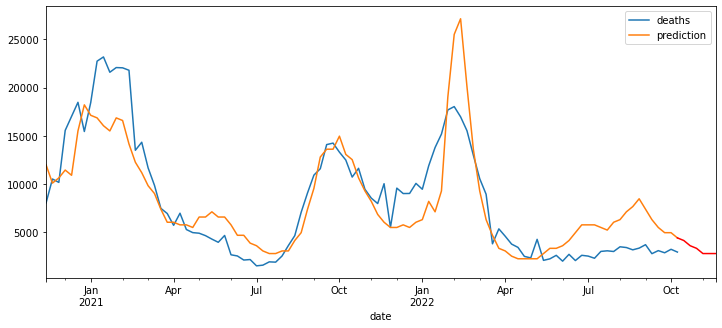

In [38]:
fig,ax = plt.subplots(figsize=(12,5))
covid[['deaths','prediction']].plot(ax=ax)
last_7weeks.forecast.plot(ax=ax,color='red')

<AxesSubplot:xlabel='google_searches_6weeks_shift', ylabel='deaths'>

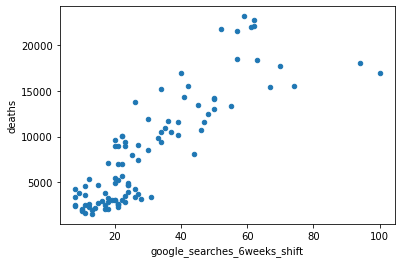

In [39]:
covid.plot.scatter(x='google_searches_6weeks_shift',y='deaths')

## Adding polynomial features

In [41]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline 

In [42]:
pipe = Pipeline(steps = [
    ('scaler',MinMaxScaler()),
    ('poly_features',PolynomialFeatures(degree=2)), #fits a line to your data for a more accurate result
    ('reg', LinearRegression())
])
pipe
# scaler: value-min/max-min to scale to keep the numbers small 

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('poly_features', PolynomialFeatures()),
                ('reg', LinearRegression())])

In [44]:
pipe.fit(X,y)
covid['prediction_poly'] = pipe.predict(X)

In [46]:
last_7weeks.columns = ['google_searches_6weeks_shift','forecast']
last_7weeks

,google_searches_6weeks_shift,forecast
2022-10-09,16.0,4399.892528
2022-10-16,15.0,4129.092850
2022-10-23,13.0,3587.493495
2022-10-30,12.0,3316.693818
2022-11-06,10.0,2775.094463
2022-11-13,10.0,2775.094463
2022-11-20,10.0,2775.094463


In [48]:
last_7weeks['forecast_poly'] = pipe.predict(last_7weeks[['google_searches_6weeks_shift']])
last_7weeks

,google_searches_6weeks_shift,forecast,forecast_poly
2022-10-09,16.0,4399.892528,3857.589795
2022-10-16,15.0,4129.092850,3441.189374
2022-10-23,13.0,3587.493495,2592.386704
2022-10-30,12.0,3316.693818,2159.984454
2022-11-06,10.0,2775.094463,1279.178125
2022-11-13,10.0,2775.094463,1279.178125
2022-11-20,10.0,2775.094463,1279.178125


<AxesSubplot:xlabel='date'>

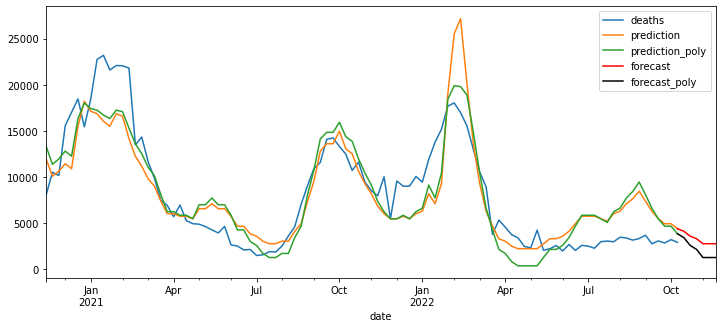

In [51]:
fig,ax = plt.subplots(figsize=(12,5))
covid[['deaths','prediction','prediction_poly']].plot(ax=ax)
last_7weeks[['forecast','forecast_poly']].plot(ax=ax,color=['red','black'])